In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.dropna(subset="RainTomorrow", inplace=True)

<Axes: title={'center': 'No. Of Rows per Year'}, xlabel='Date', ylabel='count'>

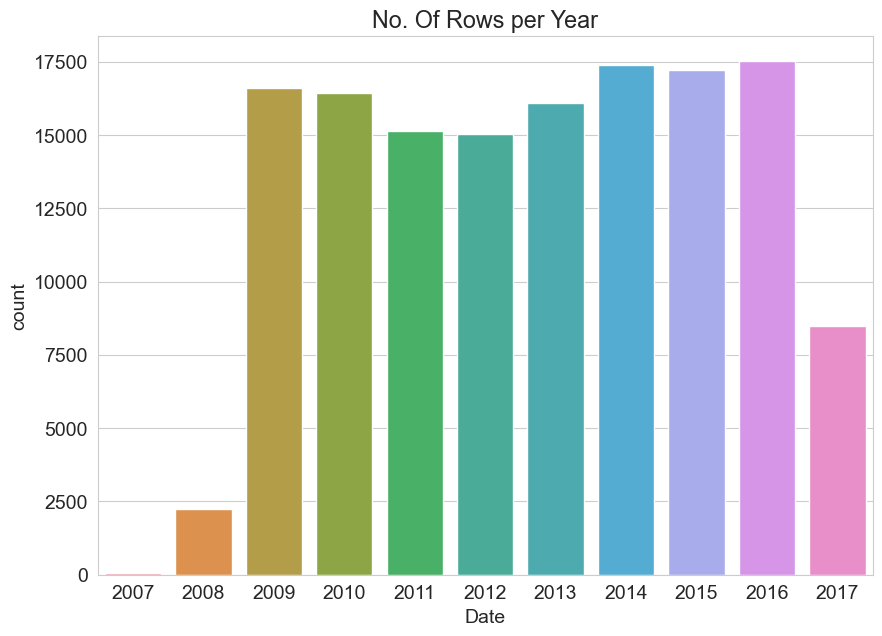

In [6]:
plt.title("No. Of Rows per Year")
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

In [7]:
year = pd.to_datetime(df.Date).dt.year

In [8]:
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [9]:
train_df.shape, val_df.shape, test_df.shape

((98988, 23), (17231, 23), (25974, 23))

In [54]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'


In [11]:
numerical_cols = train_df[input_cols].select_dtypes(include='number').columns
categorical_cols = train_df[input_cols].select_dtypes(include='object').columns

In [12]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [13]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [14]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [15]:
train_inputs[categorical_cols] = train_df[categorical_cols].fillna("Unknown")
val_inputs[categorical_cols] = val_df[categorical_cols].fillna("Unknown")
test_inputs[categorical_cols] = test_df[categorical_cols].fillna("Unknown")

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy='mean').fit(df[numerical_cols])

In [18]:
train_inputs[numerical_cols]= imputer.transform(train_inputs[numerical_cols])

In [19]:
val_inputs[numerical_cols]= imputer.transform(val_inputs[numerical_cols])

In [20]:
test_inputs[numerical_cols]= imputer.transform(test_inputs[numerical_cols])

In [21]:
# train_inputs[categorical_cols].isna().sum()

### Scaling Numeric Features

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler().fit(df[numerical_cols])

In [24]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])

In [25]:
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])

In [26]:
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [28]:
encoded_cols = list(encoder.get_feature_names_out())
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\4019206765.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\4019206765.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\4019206765.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [29]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

In [30]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_18752\922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [31]:
X_train = train_inputs[numerical_cols.tolist()+ encoded_cols]
X_val = val_inputs[numerical_cols.tolist() + encoded_cols]
X_test = test_inputs[numerical_cols.tolist()+ encoded_cols]

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
2133,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2134,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2137,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### Training and Visualizing Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)

In [34]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 609 ms
Wall time: 1.49 s


DecisionTreeClassifier(max_depth=3, random_state=42)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
train_preds = model.predict(X_train)
pd.value_counts(train_preds)

No     88001
Yes    10987
dtype: int64

In [37]:
accuracy_score(train_targets, train_preds)

0.8291308037337859

In [38]:
# list(model.predict_proba(X_train))

In [39]:
val_preds = model.predict(X_val)
accuracy_score(val_targets, val_preds)

0.8334397307178921

In [40]:
model.score(X_val, val_targets)

0.8334397307178921

In [41]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]\ncla

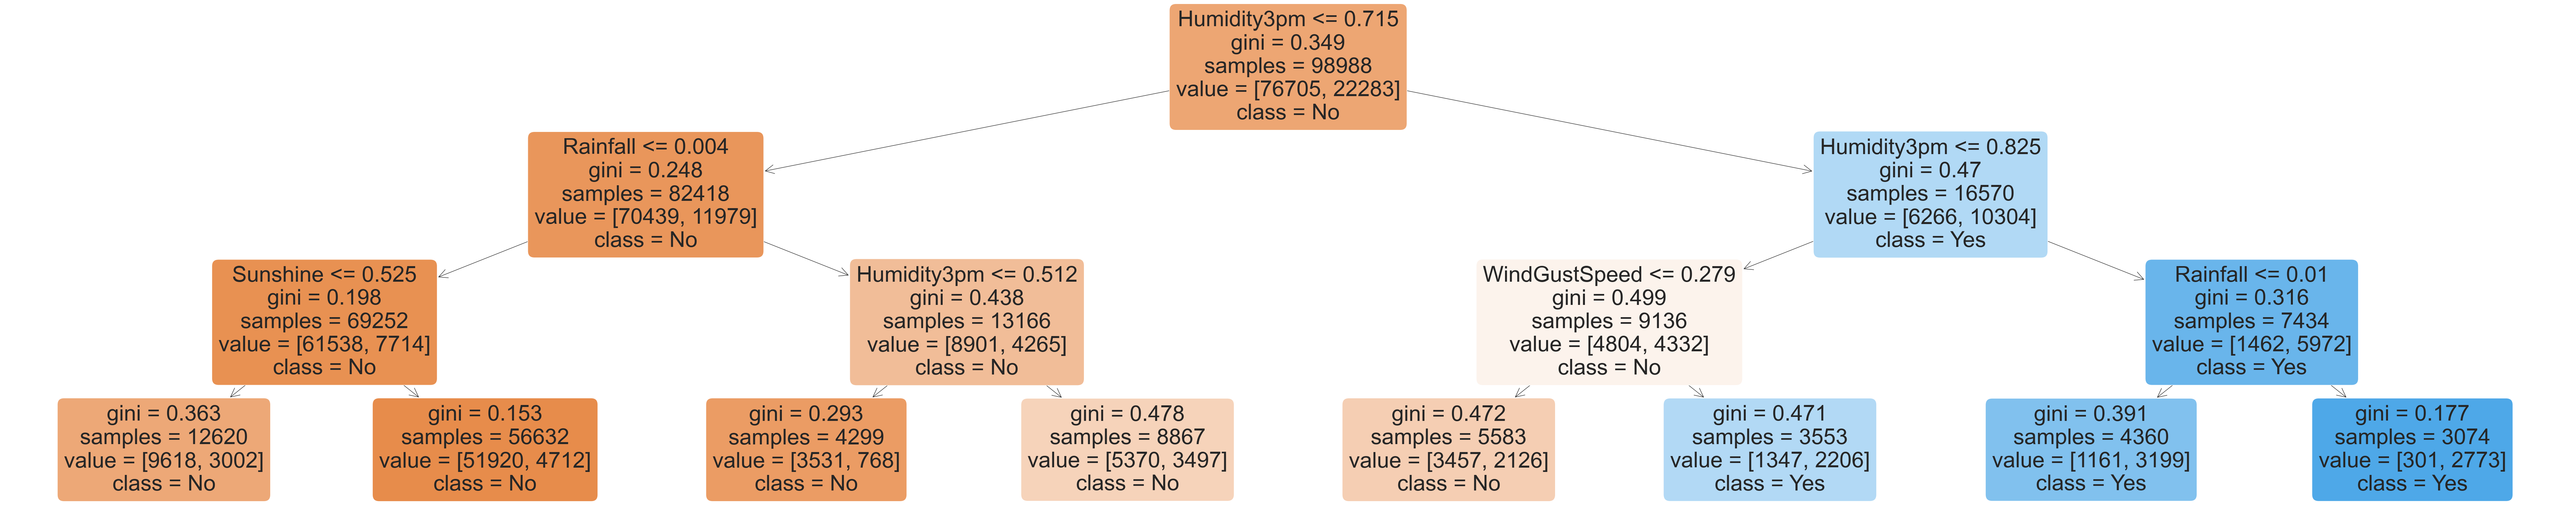

In [42]:
plt.figure(figsize=(100, 20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)

In [43]:
model.tree_.max_depth

3

In [44]:
tree_text = export_text(model, feature_names = list(X_train.columns))
print(tree_text)

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [45]:
model.feature_importances_

array([0.        , 0.        , 0.11887326, 0.        , 0.05327578,
       0.02700542, 0.        , 0.        , 0.        , 0.80084554,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [46]:
importances = pd.DataFrame(dict(features=X_train.columns, importances=model.feature_importances_)).sort_values("importances", ascending=False)

<Axes: xlabel='importances', ylabel='features'>

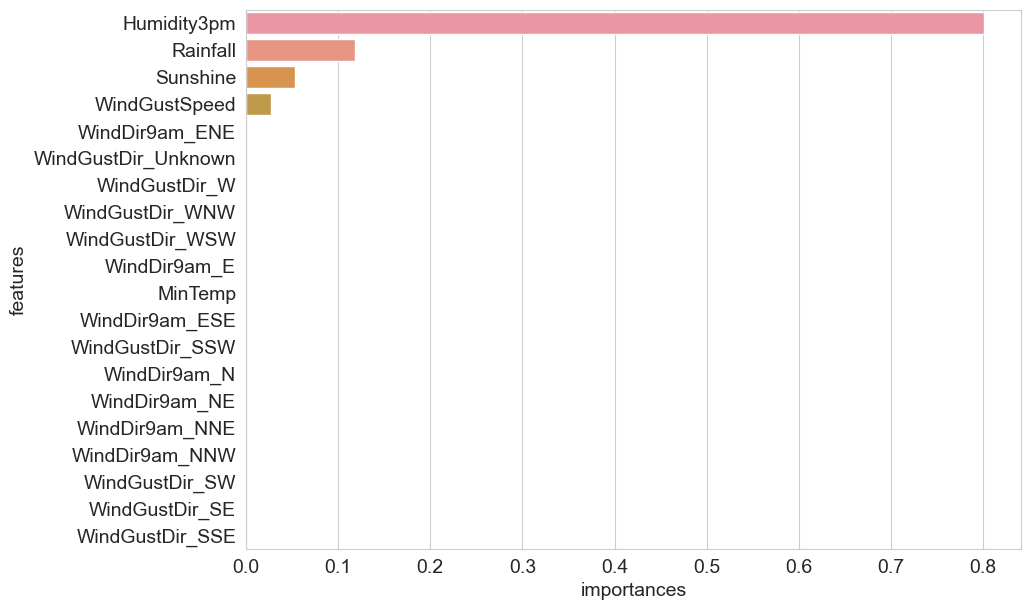

In [47]:
sns.barplot(x='importances', y='features', data=importances.head(20))

In [48]:
def estimate_decision_tree(max_d):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, train_targets)
    
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    
    train_error = 1 - train_accuracy
    val_error = 1- val_accuracy
    
    train_accuracy = model.score(X_val, val_targets)
#     print(f"The training accuracy score is {train_accuracy} having an error percentage of {train_error}")
#     print(f"The validation accuracy score is {val_accuracy} having an error percentage of {val_error}")   
    errors_df = dict(Max_Depth = max_d, Training_Error = train_error, Validation_Error= val_error)
    return val_accuracy, train_accuracy, errors_df


In [49]:
estimate_decision_tree(3)[-1]

{'Max_Depth': 3,
 'Training_Error': 0.1708691962662141,
 'Validation_Error': 0.16656026928210788}

In [50]:
j = estimate_decision_tree(1)[0]

for i in np.arange(1, 40):
    if estimate_decision_tree(i)[0]  > j:
        j = estimate_decision_tree(i)[0]
        print(j, i)
    
np.arange(1, 40)

0.8272880273924903 2
0.8334397307178921 3
0.8356450583251117 4


KeyboardInterrupt: 

In [ ]:
errors_df = pd.DataFrame([estimate_decision_tree(x)[-1] for x in list(range(1, 20))])

In [ ]:
errors_df.sort_values([
    'Validation_Error', 'Training_Error'
], ascending=True)

In [ ]:
plt.plot(errors_df['Max_Depth'], errors_df['Training_Error'], label='Training')
plt.plot(errors_df['Max_Depth'], errors_df['Validation_Error'], label="Validation")
plt.legend();
plt.title("TRAINING VS VALIDATION ERROR")


### 7 is the best max_depth

In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train, train_targets)

In [ ]:
model.score(X_train, train_targets)

In [ ]:
model.score(X_val, val_targets)

In [ ]:


model = DecisionTreeClassifier(max_leaf_nodes=500, random_state=42)
model.fit(X_train, train_targets)

In [ ]:
model.score(X_train, train_targets)

In [ ]:
model.score(X_val, val_targets)

In [ ]:
model.tree_.max_depth

In [ ]:
def estimate_decision_treeB(max_d):
    model = DecisionTreeClassifier(max_leaf_nodes=max_d, random_state=42)
    model.fit(X_train, train_targets)
    
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    
    train_error = 1 - train_accuracy
    val_error = 1- val_accuracy
    
    train_accuracy = model.score(X_val, val_targets)
#     print(f"The training accuracy score is {train_accuracy} having an error percentage of {train_error}")
#     print(f"The validation accuracy score is {val_accuracy} having an error percentage of {val_error}")   
    errors_df = dict(Max_Depth = max_d, Training_Error = train_error, Validation_Error= val_error)
    return val_accuracy


In [ ]:
j = estimate_decision_treeB(128)

for i in np.arange(157, 400):
    if estimate_decision_treeB(i)  > j:
        j = estimate_decision_tree(i)[0]
        print(j, i)
j